vanishing gradient problem is a common issue in training deep neural networks, where gradients used to update the weights diminish exponentially as they propagate through the network layers, leading to slow or stalled training

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

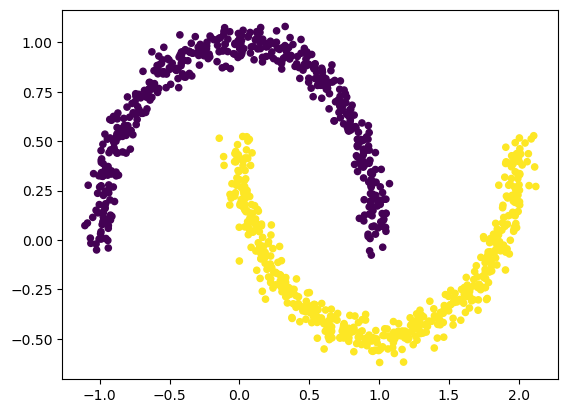

In [65]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:,0],X[:,1], c=y,s=20)
plt.show()

In [66]:
#add too many hidden layers to make a deep network, to demonstrate a vanishing gd problem


model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.get_weights()[0] #get weights of the first layer

array([[-0.27970806,  0.4129278 , -0.17122126, -0.32230893, -0.32367903,
         0.10500413, -0.5625979 , -0.43163633,  0.36333722,  0.22230911],
       [ 0.34166867, -0.22995135,  0.28721493, -0.35666096,  0.04263759,
         0.4238972 , -0.21725908, -0.5338008 , -0.3964211 ,  0.6114616 ]],
      dtype=float32)

In [69]:
old_weights = model.get_weights()[0]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5102 - loss: 0.8794
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4883 - loss: 0.8323 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5178 - loss: 0.7545 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5109 - loss: 0.7300 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5028 - loss: 0.7146 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5017 - loss: 0.7038 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5189 - loss: 0.6940 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4747 - loss: 0.6984 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4960 - loss: 0.6941 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5012 - loss: 0.6935 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4768 - loss: 0.6942 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [72]:
new_weights = model.get_weights()[0]

In [73]:
learning_rate = model.optimizer.get_config()['learning_rate']
learning_rate

0.0010000000474974513

In [74]:
gradient = (old_weights-new_weights)/learning_rate
gradient

array([[ 29.40762   ,  14.013588  ,  -2.8345284 , -21.615623  ,
         14.987528  ,   4.6546235 ,  -0.92667335,  45.238464  ,
        -35.838303  ,  -5.1262226 ],
       [-23.109375  , -11.44649   ,   2.1318495 ,  16.706228  ,
        -11.739913  ,  -3.4732816 ,   0.87293977, -35.69704   ,
         28.80287   ,   3.8819907 ]], dtype=float32)

In [75]:
percent_change = abs(100*(old_weights-new_weights)/old_weights)
percent_change

array([[10.513683  ,  3.393714  ,  1.655477  ,  6.7064924 ,  4.6303673 ,
         4.4328003 ,  0.16471328, 10.48069   ,  9.863648  ,  2.3058987 ],
       [ 6.7636805 ,  4.977788  ,  0.74224883,  4.684064  , 27.534187  ,
         0.8193689 ,  0.4017967 ,  6.6873345 ,  7.265726  ,  0.63487077]],
      dtype=float32)

In [76]:
gradient

array([[ 29.40762   ,  14.013588  ,  -2.8345284 , -21.615623  ,
         14.987528  ,   4.6546235 ,  -0.92667335,  45.238464  ,
        -35.838303  ,  -5.1262226 ],
       [-23.109375  , -11.44649   ,   2.1318495 ,  16.706228  ,
        -11.739913  ,  -3.4732816 ,   0.87293977, -35.69704   ,
         28.80287   ,   3.8819907 ]], dtype=float32)

In [77]:
# reducing hidden layers and using relu activation function

In [80]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.get_weights()[0] #get weights of the first layer
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train, y_train, epochs=100)
new_weights = model.get_weights()[0]
learning_rate = model.optimizer.get_config()['learning_rate']
learning_rate
gradient = (old_weights-new_weights)/learning_rate
gradient
percent_change = abs(100*(old_weights-new_weights)/old_weights)
percent_change
gradient

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.5074 - loss: 0.6918 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5718 - loss: 0.6867
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8125 - loss: 0.6788
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8136 - loss: 0.6687
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8178 - loss: 0.6524
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7999 - loss: 0.6295
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8311 - loss: 0.5923 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.5519 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8066 - loss: 0.5049
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7938 - loss: 0.4595
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8310 - loss: 0.3959
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

array([[ -13.819105 ,   -0.8552372,   48.66421  , -343.96783  ,
         -27.438282 ,  311.0919   , -464.62646  ,  288.61783  ,
          71.48331  ,  144.84003  ],
       [ -12.710124 ,  640.21924  ,  599.61926  , -601.1469   ,
         623.48535  , -587.91113  ,   35.884243 , -569.79504  ,
         579.78503  ,  615.7591   ]], dtype=float32)